# Preprocessing 

Contains code for preprocessing mice data, sunnybrook data, acdc data

In [1]:
import os
import matplotlib.pyplot as plt

import util
import cv2
import numpy as np
import shutil

%matplotlib inline

In [2]:
in_path = '/userdata/kerasData/segmentation-smoke-detect/unet/data/smer/images/'
mask_in_path = '/userdata/kerasData/segmentation-smoke-detect/unet/data/smer/masks/'
patients = os.listdir(in_path)
out_path = '/userdata/kerasData/segmentation-smoke-detect/unet/data/smer/preprocessed/'
patients

['1465066748_+01080_image.jpg',
 '1465066568_+00900_image.jpg',
 '1465066148_+00480_image.jpg',
 '1465065968_+00300_image.jpg',
 '1465065848_+00180_image.jpg',
 '1465066328_+00660_image.jpg',
 '1465066388_+00720_image.jpg',
 '1465065728_+00060_image.jpg',
 '1465066628_+00960_image.jpg',
 '1465066208_+00540_image.jpg',
 '1465065788_+00120_image.jpg',
 '1465066808_+01140_image.jpg',
 '1465066268_+00600_image.jpg',
 '1465066688_+01020_image.jpg',
 '1465066448_+00780_image.jpg',
 '1465066088_+00420_image.jpg',
 '1465066868_+01200_image.jpg',
 '1465066028_+00360_image.jpg',
 '1465066508_+00840_image.jpg',
 '1465066928_+01260_image.jpg',
 '1465065668_+00000_image.jpg',
 '1465065908_+00240_image.jpg']

In [8]:
for patient in patients:
    if patient != '.ipynb_checkpoints':
        
        name, time, ext = patient.split('_')
        patient = name+'_'+time
        patient_out_dir = os.path.join(out_path, patient)

        if os.path.exists(patient_out_dir):
            shutil.rmtree(patient_out_dir)
        os.makedirs(patient_out_dir)
    
#         img = cv2.imread(os.path.join(in_path,patient,'{}_image.jpg'.format(patient)))
        img = cv2.imread(os.path.join(in_path,'{}_image.jpg'.format(patient)))
#         mask = cv2.imread(os.path.join(in_path,patient,'{}_mask.jpg'.format(patient)), 0)
        mask = np.load(os.path.join(mask_in_path, '{}_mask.npy'.format(patient)))
        
        img = cv2.resize(img, (256, 256))
#         mask = cv2.resize(mask, (256, 256))
        mask = mask.astype(float)
        

        img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#         mask = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#         mask /= 255.0
        
#         flat_mask = mask.flatten()
#         for i in range(len(flat_mask)):
#             if flat_mask[i] > 0.6:
#                 flat_mask[i] = 1
#             else:
#                 flat_mask[i] = 0
#         mask = np.reshape(flat_mask, (256, 256,))

        img_arr = np.array(img)
#         label_arr = np.array(mask)
#         label_arr = label_arr[:, :, np.newaxis]
        label_arr = mask[:, :, np.newaxis]

        img_fname = '{}_image.npy'.format(patient)
        label_fname = '{}_mask.npy'.format(patient)
        print("{}\t{}".format(img_fname, label_fname))

        np.save(os.path.join(patient_out_dir, img_fname), img_arr)
        np.save(os.path.join(patient_out_dir, label_fname), label_arr)

1465066748_+01080_image.npy	1465066748_+01080_mask.npy
1465066568_+00900_image.npy	1465066568_+00900_mask.npy
1465066148_+00480_image.npy	1465066148_+00480_mask.npy
1465065968_+00300_image.npy	1465065968_+00300_mask.npy
1465065848_+00180_image.npy	1465065848_+00180_mask.npy
1465066328_+00660_image.npy	1465066328_+00660_mask.npy
1465066388_+00720_image.npy	1465066388_+00720_mask.npy
1465065728_+00060_image.npy	1465065728_+00060_mask.npy
1465066628_+00960_image.npy	1465066628_+00960_mask.npy
1465066208_+00540_image.npy	1465066208_+00540_mask.npy
1465065788_+00120_image.npy	1465065788_+00120_mask.npy
1465066808_+01140_image.npy	1465066808_+01140_mask.npy
1465066268_+00600_image.npy	1465066268_+00600_mask.npy
1465066688_+01020_image.npy	1465066688_+01020_mask.npy
1465066448_+00780_image.npy	1465066448_+00780_mask.npy
1465066088_+00420_image.npy	1465066088_+00420_mask.npy
1465066868_+01200_image.npy	1465066868_+01200_mask.npy
1465066028_+00360_image.npy	1465066028_+00360_mask.npy
1465066508

FileNotFoundError: [Errno 2] No such file or directory: '/userdata/kerasData/segmentation-smoke-detect/unet/data/smer/masks/1465065668_+00000_mask.npy'

In [6]:
patient = '1465065668_+00000'
os.path.join(in_path,'{}_image.jpg'.format(patient)))
# img_arr = np.array()


ValueError: Cannot load file containing pickled data when allow_pickle=False

In [5]:
mask.dtype

dtype('float32')

In [6]:
patients.index('00000')

53

In [7]:
patient = patients[53]
patient_out_dir = os.path.join(out_path, patient)
img_fname = '{}_image.npy'.format(patient)
img = np.load(os.path.join(patient_out_dir, img_fname))
img = img[:,:,0]
dcm = np.stack((img,)*3, -1)
mask_fname = '{}_mask.npy'.format(patient)
mask = np.load(os.path.join(patient_out_dir, mask_fname))
np.unique(mask)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.04313726, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09803922,
       0.18039216, 0.20000002, 0.21176472, 0.30980393, 0.3137255 ,
       0.31764707, 0.32156864, 0.3254902 , 0.32941177, 0.34509805,
       0.37647063, 0.4039216 , 0.4156863 , 0.427451  , 0.43921572,
       0.4431373 , 0.44705886, 0.45098042, 0.454902  , 0.45882356,
       0.46274513, 0.4666667 , 0.47058827, 0.47450984, 0.4784314 ,
       0.48235297, 0.48627454, 0.4901961 , 0.49411768, 0.49803925,
       0.5019608 , 0.5058824 , 0.50980395, 0.5137255 , 0.5176471 ,
       0.52156866, 0.5254902 , 0.5294118 , 0.53333336, 0.5372549 ,
       0.5411765 , 0.54509807, 0.54901963, 0.5529412 , 0.5568628 ,
       0.5647059 , 0.5686275 , 0.5803922 , 0.58431375, 0.5882353 ,
       0.5921569 , 0.67058825, 0.6745098 , 0.6784314 , 0.68235

array([0., 1.])

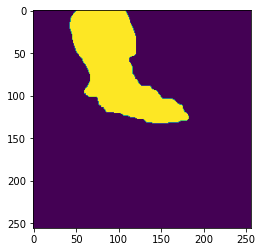

In [30]:
patient = patients[53]
os.path.join(in_path, patient)
mask = cv2.imread(os.path.join(in_path,patient,'{}_mask.jpg'.format(patient)), 0)
mask = cv2.resize(mask, (256, 256))
mask = mask.astype(float)
mask /= 255.0
# mask = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
flat_mask = mask.flatten()
for i in range(len(flat_mask)):
    if flat_mask[i] > 0.6:
        flat_mask[i] = 1
    else:
        flat_mask[i] = 0
mask = np.reshape(flat_mask, (256, 256,))
plt.imshow(mask)
np.unique(mask)

In [6]:
patient = patients[57]
patient_out_dir = os.path.join(out_path, patient)
img_fname = '{}_image.npy'.format(patient)
img = np.load(os.path.join(patient_out_dir, img_fname))
img = img[:,:,0]
dcm = np.stack((img,)*3, -1)
mask_fname = '{}_mask.npy'.format(patient)
mask = np.load(os.path.join(patient_out_dir, mask_fname))
np.unique(mask)

array([0., 1.], dtype=float32)

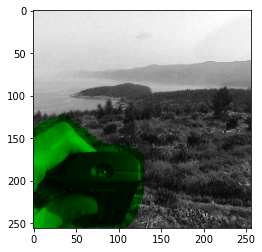

In [7]:
patient = patients[57]
patient_out_dir = os.path.join(out_path, patient)
img_fname = '{}_image.npy'.format(patient)
img = np.load(os.path.join(patient_out_dir, img_fname))
img = img[:,:,0]
dcm = np.stack((img,)*3, -1)
mask_fname = '{}_mask.npy'.format(patient)
mask = np.load(os.path.join(patient_out_dir, mask_fname))
# print(mask)
mask = np.array([[True if c == 1 else False for c in row] for row in mask])
green_multiplier = [0., 1., 0.]
dcm[mask, :]*= green_multiplier
plt.imshow(dcm)


In [37]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

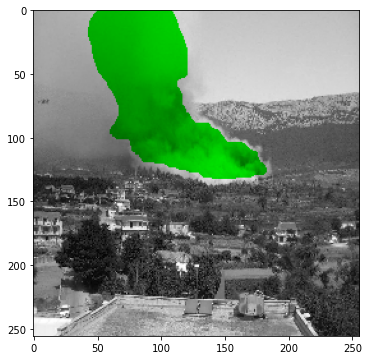

In [33]:
import numpy as np
# for patient in patients:
#     if patient != '.ipynb_checkpoints':
patient = patients[53]
patient_out_dir = os.path.join(out_path, patient)
img_fname = '{}_image.npy'.format(patient)
img = np.load(os.path.join(patient_out_dir, img_fname))
img = img[:, :, 0]
mask_fname = '{}_mask.npy'.format(patient)
mask = np.load(os.path.join(patient_out_dir, mask_fname))
flat_mask = mask.flatten()
for i in range(len(flat_mask)):
    if flat_mask[i] > 0.6:
        flat_mask[i] = 1
    else:
        flat_mask[i] = 0
new_mask= np.reshape(flat_mask, (256, 256, 1))
util.overlay_contour(img, new_mask, pos=1, vis=True)

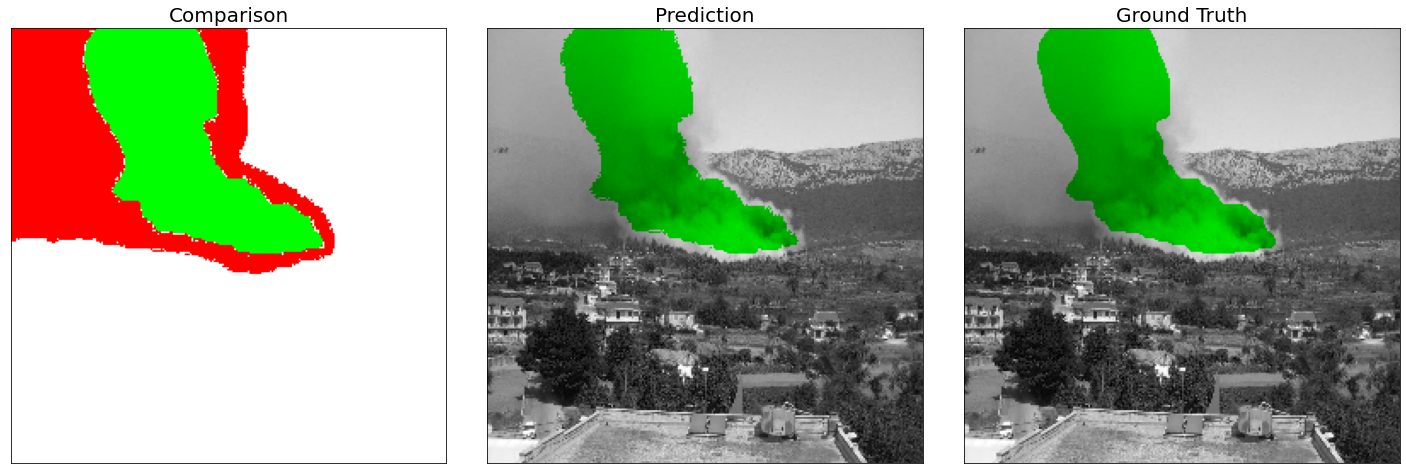

In [34]:
from plot_utils_copy import display_pred_comparison
display_pred_comparison(new_mask, mask, img);

In [55]:
mask.shape
np.unique(mask)
# plt.imshow(mask, cmap='Greys')

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.04313726, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09803922,
       0.18039216, 0.20000002, 0.21176472, 0.30980393, 0.3137255 ,
       0.31764707, 0.32156864, 0.3254902 , 0.32941177, 0.34509805,
       0.37647063, 0.4039216 , 0.4156863 , 0.427451  , 0.43921572,
       0.4431373 , 0.44705886, 0.45098042, 0.454902  , 0.45882356,
       0.46274513, 0.4666667 , 0.47058827, 0.47450984, 0.4784314 ,
       0.48235297, 0.48627454, 0.4901961 , 0.49411768, 0.49803925,
       0.5019608 , 0.5058824 , 0.50980395, 0.5137255 , 0.5176471 ,
       0.52156866, 0.5254902 , 0.5294118 , 0.53333336, 0.5372549 ,
       0.5411765 , 0.54509807, 0.54901963, 0.5529412 , 0.5568628 ,
       0.5647059 , 0.5686275 , 0.5803922 , 0.58431375, 0.5882353 ,
       0.5921569 , 0.67058825, 0.6745098 , 0.6784314 , 0.68235

In [29]:
flat_mask = mask.flatten()
for i in range(len(flat_mask)):
    if flat_mask[i] > 0.6:
        flat_mask[i] = 1
    else:
        flat_mask[i] = 0
np.unique(flat_mask)

array([0., 1.], dtype=float32)

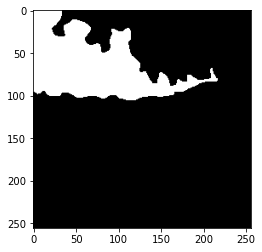

In [30]:
new_mask= np.reshape(flat_mask, (256, 256, 1))
plt.imshow(new_mask, cmap='gray')

In [18]:
patient = patients[28]
patient_out_dir = os.path.join(out_path, patient)
img_fname = '{}_image.npy'.format(patient)
img = np.load(os.path.join(patient_out_dir, img_fname))
img = img[:, :, 0]
mask_fname = '{}_mask.npy'.format(patient)
mask = np.load(os.path.join(patient_out_dir, mask_fname))

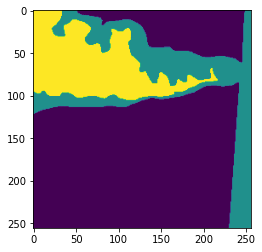

In [19]:
plt.imshow(mask)

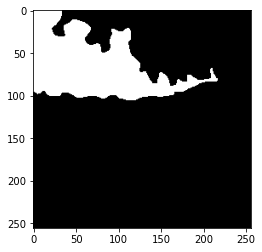

In [27]:
flat_mask = mask.flatten()
for i in range(len(flat_mask)):
    if flat_mask[i] > 0.6:
        flat_mask[i] = 1
    else:
        flat_mask[i] = 0
new_mask= np.reshape(flat_mask, (256, 256, 1))
plt.imshow(new_mask, cmap='gray')

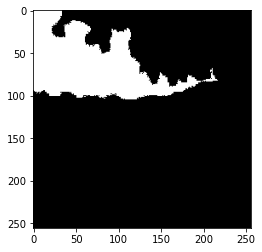

In [28]:
flat_mask = mask.flatten()
for i in range(len(flat_mask)):
    if flat_mask[i] < 1:
        flat_mask[i] = 0
new_mask= np.reshape(flat_mask, (256, 256, 1))
plt.imshow(new_mask, cmap='gray')

### Mice

In [19]:
# zero_filling = 'zf2_context'
# mice_root = '/oasis/projects/nsf/csd538/mhnguyen/shared/ucsd_cardiology/data/mice-data/{}/'.format(zero_filling)
mice_root = '/userdata/kerasData/ucsd-medical-master/unet/data/'
mice_data_dirs = ['training2']

                  
# join root w data_dirs
mice_data_dirs = [os.path.join(mice_root, d) for d in mice_data_dirs]

mice_crop_size = 180
mice_out_dir = '/userdata/kerasData/ucsd-medical-master/unet/'
mice_out_dir += 'data/preprocessed/smoke_{}_npy/'.format(mice_crop_size)

In [22]:
import mice_preprocessor as mice_preproc

preproc = mice_preproc.MicePreprocessor(crop_size=mice_crop_size, 
                                        context_type=None, 
                                        invert_labels=False, 
                                        verbose=True)
# preproc.load(mice_data_dirs)

In [25]:
preproc.write(mice_out_dir, mode='patients', ftype='numpy')
# preproc._write_split_dirs(mice_out_dir, split=[0.75, .15, .10], ftype='numpy')

### Sunnybrook

In [2]:
contour_type = 'i'
sb_root = '/oasis/projects/nsf/csd538/mhnguyen/project-share/ucsd-medical/data/sunnybrook_original/'
sb_data_dirs = {
    'train': {'images': os.path.join(sb_root, 'challenge_training'),
              'labels': os.path.join(sb_root, 'Sunnybrook_Cardiac_MR_Database_ContoursPart1')},
    'val': {'images': os.path.join(sb_root,'challenge_validation'),
            'labels': os.path.join(sb_root, 'Sunnybrook_Cardiac_MR_Database_ContoursPart2')},
    'test': {'images': os.path.join(sb_root,'challenge_online'),
            'labels': os.path.join(sb_root,'Sunnybrook_Cardiac_MR_Database_ContoursPart3')}
}

sb_crop_size = 180
sb_out_dir = '/oasis/projects/nsf/csd538/mhnguyen/project-share/ucsd-medical/'
sb_out_dir += 'data/preprocessed/sb_{}_npy/'.format(sb_crop_size)

In [3]:
import sunnybrook_preprocessor as sb_preproc

preproc = sb_preproc.SunnybrookPreprocessor(crop_size=sb_crop_size,
                                            invert_labels=True,
                                            verbose=True)
preproc.load(sb_data_dirs)

	Mapping ground truth i-contours to images...
	Number of examples: 279
	Processing 279 images and labels ...

	Mapping ground truth i-contours to images...
	Number of examples: 266
	Processing 266 images and labels ...

	Mapping ground truth i-contours to images...
	Number of examples: 260
	Processing 260 images and labels ...



In [14]:
#preproc.write(sb_out_dir, overwrite=True)

### ACDC

In [2]:
acdc_root = '/oasis/projects/nsf/csd538/mhnguyen/project-share/ucsd-medical/data/ACDC/processed_acdc_dataset/hdf5_files/'
acdc_data_dirs = {
    'train': os.path.join(acdc_root, 'train_set'),
    'val': os.path.join(acdc_root, 'validation_set'),
    'test': os.path.join(acdc_root, 'test_set')
}

acdc_crop_size = 180
acdc_out_dir = '/oasis/projects/nsf/csd538/mhnguyen/project-share/ucsd-medical/'
acdc_out_dir += 'data/preprocessed/acdc_{}_npy/'.format(acdc_crop_size)

In [3]:
import acdc_preprocessor as acdc_preproc

preproc = acdc_preproc.ACDCPreprocessor(crop_size=acdc_crop_size,
                                        invert_labels=True,
                                        verbose=True)
preproc.load(acdc_data_dirs)

['train', 'val', 'test']


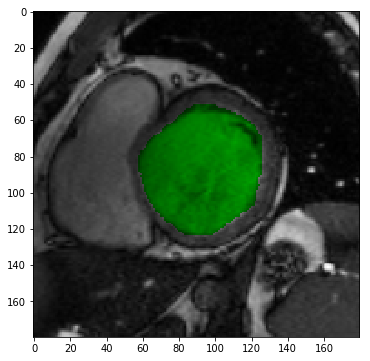

In [8]:
#preproc.show_sample_image
import numpy as np
print(list(preproc.data.keys()))
p = np.random.choice(list(preproc.data.keys()))
i = np.random.randint(0, len(preproc.data[p]))
img = preproc.data[p]['images'][i][:,:,0]
ctr = preproc.data[p]['labels'][i][:,:,0]
util.overlay_contour(img, ctr, pos=1, vis=True)

In [10]:
preproc.write(acdc_out_dir, overwrite=True)

train
acdc_P_002_ED_00_DCM_image.npy	acdc_P_002_ED_00_DCM_mask.npy
acdc_P_002_ED_01_DCM_image.npy	acdc_P_002_ED_01_DCM_mask.npy
acdc_P_002_ED_02_DCM_image.npy	acdc_P_002_ED_02_DCM_mask.npy
acdc_P_002_ED_03_DCM_image.npy	acdc_P_002_ED_03_DCM_mask.npy
acdc_P_002_ED_04_DCM_image.npy	acdc_P_002_ED_04_DCM_mask.npy
acdc_P_002_ED_05_DCM_image.npy	acdc_P_002_ED_05_DCM_mask.npy
acdc_P_002_ED_06_DCM_image.npy	acdc_P_002_ED_06_DCM_mask.npy
acdc_P_002_ED_07_DCM_image.npy	acdc_P_002_ED_07_DCM_mask.npy
acdc_P_002_ED_08_DCM_image.npy	acdc_P_002_ED_08_DCM_mask.npy
acdc_P_002_ED_09_DCM_image.npy	acdc_P_002_ED_09_DCM_mask.npy
acdc_P_002_ES_00_DCM_image.npy	acdc_P_002_ES_00_DCM_mask.npy
acdc_P_002_ES_01_DCM_image.npy	acdc_P_002_ES_01_DCM_mask.npy
acdc_P_002_ES_02_DCM_image.npy	acdc_P_002_ES_02_DCM_mask.npy
acdc_P_002_ES_03_DCM_image.npy	acdc_P_002_ES_03_DCM_mask.npy
acdc_P_002_ES_04_DCM_image.npy	acdc_P_002_ES_04_DCM_mask.npy
acdc_P_002_ES_05_DCM_image.npy	acdc_P_002_ES_05_DCM_mask.npy
acdc_P_002_ES_06_D

acdc_P_012_ED_06_DCM_image.npy	acdc_P_012_ED_06_DCM_mask.npy
acdc_P_012_ED_07_DCM_image.npy	acdc_P_012_ED_07_DCM_mask.npy
acdc_P_012_ED_08_DCM_image.npy	acdc_P_012_ED_08_DCM_mask.npy
acdc_P_012_ED_09_DCM_image.npy	acdc_P_012_ED_09_DCM_mask.npy
acdc_P_012_ES_01_DCM_image.npy	acdc_P_012_ES_01_DCM_mask.npy
acdc_P_012_ES_02_DCM_image.npy	acdc_P_012_ES_02_DCM_mask.npy
acdc_P_012_ES_03_DCM_image.npy	acdc_P_012_ES_03_DCM_mask.npy
acdc_P_012_ES_04_DCM_image.npy	acdc_P_012_ES_04_DCM_mask.npy
acdc_P_012_ES_05_DCM_image.npy	acdc_P_012_ES_05_DCM_mask.npy
acdc_P_012_ES_06_DCM_image.npy	acdc_P_012_ES_06_DCM_mask.npy
acdc_P_012_ES_07_DCM_image.npy	acdc_P_012_ES_07_DCM_mask.npy
acdc_P_012_ES_08_DCM_image.npy	acdc_P_012_ES_08_DCM_mask.npy
acdc_P_012_ES_09_DCM_image.npy	acdc_P_012_ES_09_DCM_mask.npy
acdc_P_013_ED_00_DCM_image.npy	acdc_P_013_ED_00_DCM_mask.npy
acdc_P_013_ED_01_DCM_image.npy	acdc_P_013_ED_01_DCM_mask.npy
acdc_P_013_ED_02_DCM_image.npy	acdc_P_013_ED_02_DCM_mask.npy
acdc_P_013_ED_03_DCM_ima

acdc_P_021_ES_07_HCM_image.npy	acdc_P_021_ES_07_HCM_mask.npy
acdc_P_021_ES_08_HCM_image.npy	acdc_P_021_ES_08_HCM_mask.npy
acdc_P_023_ED_00_HCM_image.npy	acdc_P_023_ED_00_HCM_mask.npy
acdc_P_023_ED_01_HCM_image.npy	acdc_P_023_ED_01_HCM_mask.npy
acdc_P_023_ED_02_HCM_image.npy	acdc_P_023_ED_02_HCM_mask.npy
acdc_P_023_ED_03_HCM_image.npy	acdc_P_023_ED_03_HCM_mask.npy
acdc_P_023_ED_04_HCM_image.npy	acdc_P_023_ED_04_HCM_mask.npy
acdc_P_023_ED_05_HCM_image.npy	acdc_P_023_ED_05_HCM_mask.npy
acdc_P_023_ED_06_HCM_image.npy	acdc_P_023_ED_06_HCM_mask.npy
acdc_P_023_ED_07_HCM_image.npy	acdc_P_023_ED_07_HCM_mask.npy
acdc_P_023_ES_00_HCM_image.npy	acdc_P_023_ES_00_HCM_mask.npy
acdc_P_023_ES_01_HCM_image.npy	acdc_P_023_ES_01_HCM_mask.npy
acdc_P_023_ES_02_HCM_image.npy	acdc_P_023_ES_02_HCM_mask.npy
acdc_P_023_ES_03_HCM_image.npy	acdc_P_023_ES_03_HCM_mask.npy
acdc_P_023_ES_04_HCM_image.npy	acdc_P_023_ES_04_HCM_mask.npy
acdc_P_023_ES_05_HCM_image.npy	acdc_P_023_ES_05_HCM_mask.npy
acdc_P_023_ES_06_HCM_ima

acdc_P_034_ED_05_HCM_image.npy	acdc_P_034_ED_05_HCM_mask.npy
acdc_P_034_ED_06_HCM_image.npy	acdc_P_034_ED_06_HCM_mask.npy
acdc_P_034_ED_07_HCM_image.npy	acdc_P_034_ED_07_HCM_mask.npy
acdc_P_034_ED_08_HCM_image.npy	acdc_P_034_ED_08_HCM_mask.npy
acdc_P_034_ED_09_HCM_image.npy	acdc_P_034_ED_09_HCM_mask.npy
acdc_P_034_ES_00_HCM_image.npy	acdc_P_034_ES_00_HCM_mask.npy
acdc_P_034_ES_01_HCM_image.npy	acdc_P_034_ES_01_HCM_mask.npy
acdc_P_034_ES_02_HCM_image.npy	acdc_P_034_ES_02_HCM_mask.npy
acdc_P_034_ES_03_HCM_image.npy	acdc_P_034_ES_03_HCM_mask.npy
acdc_P_034_ES_04_HCM_image.npy	acdc_P_034_ES_04_HCM_mask.npy
acdc_P_034_ES_05_HCM_image.npy	acdc_P_034_ES_05_HCM_mask.npy
acdc_P_034_ES_06_HCM_image.npy	acdc_P_034_ES_06_HCM_mask.npy
acdc_P_034_ES_07_HCM_image.npy	acdc_P_034_ES_07_HCM_mask.npy
acdc_P_034_ES_08_HCM_image.npy	acdc_P_034_ES_08_HCM_mask.npy
acdc_P_035_ED_00_HCM_image.npy	acdc_P_035_ED_00_HCM_mask.npy
acdc_P_035_ED_01_HCM_image.npy	acdc_P_035_ED_01_HCM_mask.npy
acdc_P_035_ED_02_HCM_ima

acdc_P_044_ED_00_MINF_image.npy	acdc_P_044_ED_00_MINF_mask.npy
acdc_P_044_ED_01_MINF_image.npy	acdc_P_044_ED_01_MINF_mask.npy
acdc_P_044_ED_02_MINF_image.npy	acdc_P_044_ED_02_MINF_mask.npy
acdc_P_044_ED_03_MINF_image.npy	acdc_P_044_ED_03_MINF_mask.npy
acdc_P_044_ED_04_MINF_image.npy	acdc_P_044_ED_04_MINF_mask.npy
acdc_P_044_ED_05_MINF_image.npy	acdc_P_044_ED_05_MINF_mask.npy
acdc_P_044_ED_06_MINF_image.npy	acdc_P_044_ED_06_MINF_mask.npy
acdc_P_044_ED_07_MINF_image.npy	acdc_P_044_ED_07_MINF_mask.npy
acdc_P_044_ED_08_MINF_image.npy	acdc_P_044_ED_08_MINF_mask.npy
acdc_P_044_ES_00_MINF_image.npy	acdc_P_044_ES_00_MINF_mask.npy
acdc_P_044_ES_01_MINF_image.npy	acdc_P_044_ES_01_MINF_mask.npy
acdc_P_044_ES_02_MINF_image.npy	acdc_P_044_ES_02_MINF_mask.npy
acdc_P_044_ES_03_MINF_image.npy	acdc_P_044_ES_03_MINF_mask.npy
acdc_P_044_ES_04_MINF_image.npy	acdc_P_044_ES_04_MINF_mask.npy
acdc_P_044_ES_05_MINF_image.npy	acdc_P_044_ES_05_MINF_mask.npy
acdc_P_044_ES_06_MINF_image.npy	acdc_P_044_ES_06_MINF_m

acdc_P_057_ED_00_MINF_image.npy	acdc_P_057_ED_00_MINF_mask.npy
acdc_P_057_ED_01_MINF_image.npy	acdc_P_057_ED_01_MINF_mask.npy
acdc_P_057_ED_02_MINF_image.npy	acdc_P_057_ED_02_MINF_mask.npy
acdc_P_057_ED_03_MINF_image.npy	acdc_P_057_ED_03_MINF_mask.npy
acdc_P_057_ED_04_MINF_image.npy	acdc_P_057_ED_04_MINF_mask.npy
acdc_P_057_ED_05_MINF_image.npy	acdc_P_057_ED_05_MINF_mask.npy
acdc_P_057_ED_06_MINF_image.npy	acdc_P_057_ED_06_MINF_mask.npy
acdc_P_057_ED_07_MINF_image.npy	acdc_P_057_ED_07_MINF_mask.npy
acdc_P_057_ES_00_MINF_image.npy	acdc_P_057_ES_00_MINF_mask.npy
acdc_P_057_ES_01_MINF_image.npy	acdc_P_057_ES_01_MINF_mask.npy
acdc_P_057_ES_02_MINF_image.npy	acdc_P_057_ES_02_MINF_mask.npy
acdc_P_057_ES_03_MINF_image.npy	acdc_P_057_ES_03_MINF_mask.npy
acdc_P_057_ES_04_MINF_image.npy	acdc_P_057_ES_04_MINF_mask.npy
acdc_P_057_ES_05_MINF_image.npy	acdc_P_057_ES_05_MINF_mask.npy
acdc_P_057_ES_06_MINF_image.npy	acdc_P_057_ES_06_MINF_mask.npy
acdc_P_058_ED_00_MINF_image.npy	acdc_P_058_ED_00_MINF_m

acdc_P_071_ED_00_NOR_image.npy	acdc_P_071_ED_00_NOR_mask.npy
acdc_P_071_ED_01_NOR_image.npy	acdc_P_071_ED_01_NOR_mask.npy
acdc_P_071_ED_02_NOR_image.npy	acdc_P_071_ED_02_NOR_mask.npy
acdc_P_071_ED_03_NOR_image.npy	acdc_P_071_ED_03_NOR_mask.npy
acdc_P_071_ED_04_NOR_image.npy	acdc_P_071_ED_04_NOR_mask.npy
acdc_P_071_ED_05_NOR_image.npy	acdc_P_071_ED_05_NOR_mask.npy
acdc_P_071_ED_06_NOR_image.npy	acdc_P_071_ED_06_NOR_mask.npy
acdc_P_071_ED_07_NOR_image.npy	acdc_P_071_ED_07_NOR_mask.npy
acdc_P_071_ED_08_NOR_image.npy	acdc_P_071_ED_08_NOR_mask.npy
acdc_P_071_ED_09_NOR_image.npy	acdc_P_071_ED_09_NOR_mask.npy
acdc_P_071_ES_01_NOR_image.npy	acdc_P_071_ES_01_NOR_mask.npy
acdc_P_071_ES_02_NOR_image.npy	acdc_P_071_ES_02_NOR_mask.npy
acdc_P_071_ES_03_NOR_image.npy	acdc_P_071_ES_03_NOR_mask.npy
acdc_P_071_ES_04_NOR_image.npy	acdc_P_071_ES_04_NOR_mask.npy
acdc_P_071_ES_05_NOR_image.npy	acdc_P_071_ES_05_NOR_mask.npy
acdc_P_071_ES_06_NOR_image.npy	acdc_P_071_ES_06_NOR_mask.npy
acdc_P_071_ES_07_NOR_ima

acdc_P_082_ES_12_RV_image.npy	acdc_P_082_ES_12_RV_mask.npy
acdc_P_082_ES_13_RV_image.npy	acdc_P_082_ES_13_RV_mask.npy
acdc_P_082_ES_14_RV_image.npy	acdc_P_082_ES_14_RV_mask.npy
acdc_P_082_ES_15_RV_image.npy	acdc_P_082_ES_15_RV_mask.npy
acdc_P_083_ED_00_RV_image.npy	acdc_P_083_ED_00_RV_mask.npy
acdc_P_083_ED_01_RV_image.npy	acdc_P_083_ED_01_RV_mask.npy
acdc_P_083_ED_02_RV_image.npy	acdc_P_083_ED_02_RV_mask.npy
acdc_P_083_ED_03_RV_image.npy	acdc_P_083_ED_03_RV_mask.npy
acdc_P_083_ED_04_RV_image.npy	acdc_P_083_ED_04_RV_mask.npy
acdc_P_083_ED_05_RV_image.npy	acdc_P_083_ED_05_RV_mask.npy
acdc_P_083_ES_00_RV_image.npy	acdc_P_083_ES_00_RV_mask.npy
acdc_P_083_ES_01_RV_image.npy	acdc_P_083_ES_01_RV_mask.npy
acdc_P_083_ES_02_RV_image.npy	acdc_P_083_ES_02_RV_mask.npy
acdc_P_083_ES_03_RV_image.npy	acdc_P_083_ES_03_RV_mask.npy
acdc_P_083_ES_04_RV_image.npy	acdc_P_083_ES_04_RV_mask.npy
acdc_P_083_ES_05_RV_image.npy	acdc_P_083_ES_05_RV_mask.npy
acdc_P_084_ED_00_RV_image.npy	acdc_P_084_ED_00_RV_mask.n

acdc_P_096_ED_14_RV_image.npy	acdc_P_096_ED_14_RV_mask.npy
acdc_P_096_ED_15_RV_image.npy	acdc_P_096_ED_15_RV_mask.npy
acdc_P_096_ED_16_RV_image.npy	acdc_P_096_ED_16_RV_mask.npy
acdc_P_096_ED_17_RV_image.npy	acdc_P_096_ED_17_RV_mask.npy
acdc_P_096_ES_01_RV_image.npy	acdc_P_096_ES_01_RV_mask.npy
acdc_P_096_ES_02_RV_image.npy	acdc_P_096_ES_02_RV_mask.npy
acdc_P_096_ES_03_RV_image.npy	acdc_P_096_ES_03_RV_mask.npy
acdc_P_096_ES_04_RV_image.npy	acdc_P_096_ES_04_RV_mask.npy
acdc_P_096_ES_05_RV_image.npy	acdc_P_096_ES_05_RV_mask.npy
acdc_P_096_ES_06_RV_image.npy	acdc_P_096_ES_06_RV_mask.npy
acdc_P_096_ES_07_RV_image.npy	acdc_P_096_ES_07_RV_mask.npy
acdc_P_096_ES_08_RV_image.npy	acdc_P_096_ES_08_RV_mask.npy
acdc_P_096_ES_09_RV_image.npy	acdc_P_096_ES_09_RV_mask.npy
acdc_P_096_ES_10_RV_image.npy	acdc_P_096_ES_10_RV_mask.npy
acdc_P_096_ES_11_RV_image.npy	acdc_P_096_ES_11_RV_mask.npy
acdc_P_096_ES_12_RV_image.npy	acdc_P_096_ES_12_RV_mask.npy
acdc_P_096_ES_13_RV_image.npy	acdc_P_096_ES_13_RV_mask.n

acdc_P_014_ES_08_DCM_image.npy	acdc_P_014_ES_08_DCM_mask.npy
acdc_P_014_ES_09_DCM_image.npy	acdc_P_014_ES_09_DCM_mask.npy
acdc_P_031_ED_00_HCM_image.npy	acdc_P_031_ED_00_HCM_mask.npy
acdc_P_031_ED_01_HCM_image.npy	acdc_P_031_ED_01_HCM_mask.npy
acdc_P_031_ED_02_HCM_image.npy	acdc_P_031_ED_02_HCM_mask.npy
acdc_P_031_ED_03_HCM_image.npy	acdc_P_031_ED_03_HCM_mask.npy
acdc_P_031_ED_04_HCM_image.npy	acdc_P_031_ED_04_HCM_mask.npy
acdc_P_031_ED_05_HCM_image.npy	acdc_P_031_ED_05_HCM_mask.npy
acdc_P_031_ED_06_HCM_image.npy	acdc_P_031_ED_06_HCM_mask.npy
acdc_P_031_ED_07_HCM_image.npy	acdc_P_031_ED_07_HCM_mask.npy
acdc_P_031_ED_08_HCM_image.npy	acdc_P_031_ED_08_HCM_mask.npy
acdc_P_031_ED_09_HCM_image.npy	acdc_P_031_ED_09_HCM_mask.npy
acdc_P_031_ES_01_HCM_image.npy	acdc_P_031_ES_01_HCM_mask.npy
acdc_P_031_ES_02_HCM_image.npy	acdc_P_031_ES_02_HCM_mask.npy
acdc_P_031_ES_03_HCM_image.npy	acdc_P_031_ES_03_HCM_mask.npy
acdc_P_031_ES_04_HCM_image.npy	acdc_P_031_ES_04_HCM_mask.npy
acdc_P_031_ES_05_HCM_ima

acdc_P_072_ED_03_NOR_image.npy	acdc_P_072_ED_03_NOR_mask.npy
acdc_P_072_ED_04_NOR_image.npy	acdc_P_072_ED_04_NOR_mask.npy
acdc_P_072_ED_05_NOR_image.npy	acdc_P_072_ED_05_NOR_mask.npy
acdc_P_072_ED_06_NOR_image.npy	acdc_P_072_ED_06_NOR_mask.npy
acdc_P_072_ES_00_NOR_image.npy	acdc_P_072_ES_00_NOR_mask.npy
acdc_P_072_ES_01_NOR_image.npy	acdc_P_072_ES_01_NOR_mask.npy
acdc_P_072_ES_02_NOR_image.npy	acdc_P_072_ES_02_NOR_mask.npy
acdc_P_072_ES_03_NOR_image.npy	acdc_P_072_ES_03_NOR_mask.npy
acdc_P_072_ES_04_NOR_image.npy	acdc_P_072_ES_04_NOR_mask.npy
acdc_P_072_ES_05_NOR_image.npy	acdc_P_072_ES_05_NOR_mask.npy
acdc_P_072_ES_06_NOR_image.npy	acdc_P_072_ES_06_NOR_mask.npy
acdc_P_081_ED_00_RV_image.npy	acdc_P_081_ED_00_RV_mask.npy
acdc_P_081_ED_01_RV_image.npy	acdc_P_081_ED_01_RV_mask.npy
acdc_P_081_ED_02_RV_image.npy	acdc_P_081_ED_02_RV_mask.npy
acdc_P_081_ED_03_RV_image.npy	acdc_P_081_ED_03_RV_mask.npy
acdc_P_081_ED_04_RV_image.npy	acdc_P_081_ED_04_RV_mask.npy
acdc_P_081_ED_05_RV_image.npy	acdc

acdc_P_022_ED_00_HCM_image.npy	acdc_P_022_ED_00_HCM_mask.npy
acdc_P_022_ED_01_HCM_image.npy	acdc_P_022_ED_01_HCM_mask.npy
acdc_P_022_ED_02_HCM_image.npy	acdc_P_022_ED_02_HCM_mask.npy
acdc_P_022_ED_03_HCM_image.npy	acdc_P_022_ED_03_HCM_mask.npy
acdc_P_022_ED_04_HCM_image.npy	acdc_P_022_ED_04_HCM_mask.npy
acdc_P_022_ED_05_HCM_image.npy	acdc_P_022_ED_05_HCM_mask.npy
acdc_P_022_ED_06_HCM_image.npy	acdc_P_022_ED_06_HCM_mask.npy
acdc_P_022_ES_00_HCM_image.npy	acdc_P_022_ES_00_HCM_mask.npy
acdc_P_022_ES_01_HCM_image.npy	acdc_P_022_ES_01_HCM_mask.npy
acdc_P_022_ES_02_HCM_image.npy	acdc_P_022_ES_02_HCM_mask.npy
acdc_P_022_ES_03_HCM_image.npy	acdc_P_022_ES_03_HCM_mask.npy
acdc_P_022_ES_04_HCM_image.npy	acdc_P_022_ES_04_HCM_mask.npy
acdc_P_022_ES_05_HCM_image.npy	acdc_P_022_ES_05_HCM_mask.npy
acdc_P_022_ES_06_HCM_image.npy	acdc_P_022_ES_06_HCM_mask.npy
acdc_P_025_ED_00_HCM_image.npy	acdc_P_025_ED_00_HCM_mask.npy
acdc_P_025_ED_01_HCM_image.npy	acdc_P_025_ED_01_HCM_mask.npy
acdc_P_025_ED_02_HCM_ima

acdc_P_085_ED_03_RV_image.npy	acdc_P_085_ED_03_RV_mask.npy
acdc_P_085_ED_04_RV_image.npy	acdc_P_085_ED_04_RV_mask.npy
acdc_P_085_ED_05_RV_image.npy	acdc_P_085_ED_05_RV_mask.npy
acdc_P_085_ED_06_RV_image.npy	acdc_P_085_ED_06_RV_mask.npy
acdc_P_085_ED_07_RV_image.npy	acdc_P_085_ED_07_RV_mask.npy
acdc_P_085_ED_08_RV_image.npy	acdc_P_085_ED_08_RV_mask.npy
acdc_P_085_ED_09_RV_image.npy	acdc_P_085_ED_09_RV_mask.npy
acdc_P_085_ED_10_RV_image.npy	acdc_P_085_ED_10_RV_mask.npy
acdc_P_085_ED_11_RV_image.npy	acdc_P_085_ED_11_RV_mask.npy
acdc_P_085_ED_12_RV_image.npy	acdc_P_085_ED_12_RV_mask.npy
acdc_P_085_ED_13_RV_image.npy	acdc_P_085_ED_13_RV_mask.npy
acdc_P_085_ES_00_RV_image.npy	acdc_P_085_ES_00_RV_mask.npy
acdc_P_085_ES_01_RV_image.npy	acdc_P_085_ES_01_RV_mask.npy
acdc_P_085_ES_02_RV_image.npy	acdc_P_085_ES_02_RV_mask.npy
acdc_P_085_ES_03_RV_image.npy	acdc_P_085_ES_03_RV_mask.npy
acdc_P_085_ES_04_RV_image.npy	acdc_P_085_ES_04_RV_mask.npy
acdc_P_085_ES_05_RV_image.npy	acdc_P_085_ES_05_RV_mask.n